# Создание нейронной сети на Torch

In [125]:
import torch
import numpy as np

## Нейрон

<img src="img/neuron.png" width=300, heigth=300>

In [126]:
# Создание класса нейрон. weights - веса связей, bias - порог, input - вектор сигналов, подающихся на нейрон

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def forward(self, input):
    return torch.dot(self.weights, input) + self.bias # dot - скалярное произведение векторов

In [127]:
inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])

weights = torch.tensor([0.2, 0.8, -0.5, 1.0])
bias = 2.0

neuron = Neuron(weights, bias)
neuron.forward(inputs)

tensor(4.8000)

## Слой

<img src="img/Layer.png" width=300, heigth=300>

In [128]:
class Layer:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases

  def forward(self, input):
    return torch.mv(self.weights, input) + self.biases #mv - произведение вектора на матрицу

In [129]:
inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])
weights = torch.tensor([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([2.0, 3.0, 0.5])

layer = Layer(weights, biases)
layer.forward(inputs)

tensor([4.8000, 1.2100, 2.3850])

## Слой (batch)
обработка партиями

In [130]:
class Layer:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases

  def forward(self, inputs):
    return inputs @ self.weights.T + self.biases # провизведение матриц

In [131]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
weights1 = torch.tensor([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])
biases1 = torch.tensor([2.0, 3.0, 0.5])

weights2 = torch.tensor([[.1, -.14, .5], [-.5, .12, -.33], [-.44, .73, -.13]])
biases2 = torch.tensor([-1, 2, -.5])

layer1 = Layer(weights1, biases1)
hidden_input = layer1.forward(inputs1)

layer2 = Layer(weights2, biases2)
output = layer2.forward(hidden_input)
output

tensor([[ 0.5031, -1.0419, -2.0388],
        [ 0.2434, -2.7332, -5.7633],
        [-0.9931,  1.4125, -0.3565]])

## Слой (случ. иниц)

In [132]:
class Layer:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons)
    self.biases = torch.zeros(n_neurons)

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [133]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 6)
out = layer.forward(inputs1)
out

tensor([[-4.0792, -3.8367,  1.8484,  2.5475, -0.0545,  4.5863],
        [-4.0725,  3.3778,  3.8112,  0.9751, -1.1957, 11.3773],
        [ 2.1608, -6.4621, -0.2519, -1.2367,  4.0590, -0.8741]])

## Функции активации

<img src="img/Act.png" width=500, heigth=300>

Функция активации ReLU:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)
Функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

In [134]:
# RELU
class ReLU:
  def forward(self, inputs):
    return inputs.clip(min=0)    # заменить отрицательные числа нулями

In [135]:
ReLU().forward(out)

tensor([[ 0.0000,  0.0000,  1.8484,  2.5475,  0.0000,  4.5863],
        [ 0.0000,  3.3778,  3.8112,  0.9751,  0.0000, 11.3773],
        [ 2.1608,  0.0000,  0.0000,  0.0000,  4.0590,  0.0000]])

In [136]:
class Softmax:
  def forward(self, inputs):
    exp = torch.exp(inputs)
    probs = exp / exp.sum(dim=1, keepdim=True)
    return probs

In [137]:
Softmax().forward(out)

tensor([[1.4310e-04, 1.8238e-04, 5.3699e-02, 1.0804e-01, 8.0085e-03, 8.2993e-01],
        [1.9492e-07, 3.3533e-04, 5.1725e-04, 3.0340e-05, 3.4614e-06, 9.9911e-01],
        [1.2747e-01, 2.2936e-05, 1.1418e-02, 4.2646e-03, 8.5070e-01, 6.1285e-03]])

## Функции потерь

Функция потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)
Функция потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">


In [138]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 1)
out = layer.forward(inputs1)
out

tensor([[-1.6583],
        [ 4.8857],
        [-5.3353]])

In [139]:
# Среднеквадратичная ошибка
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean(torch.pow(out - y_true, 2))

In [140]:
y_true = torch.tensor([2, 3, 4]).view(-1, 1)
MSELoss().forward(out, y_true)

tensor(34.6960)

In [141]:
# Кроссэнтропия
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    correct_conf = y_pred.gather(dim=1, index=y_true.view(-1, 1))
    neglog = -torch.log(correct_conf)
    return torch.mean(neglog)

In [142]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 3)
out = layer.forward(inputs1)
out = Softmax().forward(out)
out

tensor([[4.0660e-01, 5.9336e-01, 3.5969e-05],
        [2.8973e-03, 9.9701e-01, 9.3062e-05],
        [6.3791e-01, 3.5956e-01, 2.5378e-03]])

In [143]:
y_true = torch.tensor([1, 0, 0])
CategoricalCrossentropyLoss().forward(out, y_true)

tensor(2.2718)

## Оптимизация SGD (стохастический градиентный спуск)

#### Модифицируем класс Neuron
    Сделаем так, чтобы веса нейрона инициализировались из стандартного нормального распределения:

In [144]:
# Сформируем случайную задачу регркессии
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

Граф вычислений для решения задачи:
<img src="img/back.png" width=700, heigth=700>

In [145]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)

  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias

  def backward(self, dvalue):
    self.dweights = dvalue * self.input
    self.dinput = dvalue * self.weights
    self.dbias = dvalue


class Loss:    #класс вычисления ошибок
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)


In [146]:
neuron = Neuron(4)
loss = Loss()

lr = 0.1

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    y_pred = neuron.forward(x_example)
    l = loss.forward(y_pred, y_example)
    losses.append(l)

    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias


TypeError: range() missing 1 required positional arguments: "end"

In [ ]:
neuron.weights, neuron.bias

(tensor([57.7219,  1.2114,  3.5078, 24.1808]), tensor([0.5000]))

#### Используем пакетный градиентный спуск (batch SGD + neuron)

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs, requires_grad=False)
    self.bias = torch.tensor(0.0, requires_grad=False)

  def forward(self, inputs):
    self.inputs = inputs
    return X @ self.weights.T + self.bias

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T.mv(dvalues)
      self.dbiases = dvalues.sum()


class MSELossNeuron:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    with torch.no_grad():
      self.dinputs = 2 * (y_pred - y_true) / len(y_pred)

Вычисления для решения задачи:
    <img src="img/back1.png" width=700, heigth=700>
    <img src="img/back2.png" width=700, heigth=700>

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
neuron = Neuron(4)
loss = MSELossNeuron()

lr = 0.1

for epoch in range(100):
    y_pred = neuron.forward(X)
    l = loss.forward(y_pred, y)
    loss.backward(y_pred, y)
    neuron.backward(loss.dinputs)

    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbiases
print(f'epoch {epoch} mean loss {l.mean()}')

epoch 99 mean loss 3.637296575043081e-10


In [ ]:
neuron.weights, coef

(tensor([34.1417, 62.3545, 60.4058, 52.2198]),
 array([34.14168559, 62.35449431, 60.40579793, 52.21978419]))

### Разные варианты веализации рейросети

In [ ]:
class Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons, requires_grad=False)
    self.biases = torch.zeros(n_neurons, requires_grad=False)

  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.inputs @ self.weights + self.biases
    return self.output

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T @ dvalues
      self.dbiases = torch.sum(dvalues, dim=0)
      self.dinputs = dvalues @ self.weights.T

class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()
      self.dinputs[self.inputs <= 0] = 0

class Activation_Linear:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs

  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = sample_losses.mean()
    return data_loss

class MSELoss(Loss):
  def forward(self, y_pred, y_true):
    sample_losses = torch.mean((y_true - y_pred) ** 2, dim=1)
    return sample_losses

  def backward(self, dvalues, y_true):
    with torch.no_grad():
      self.dinputs = -2 * (y_true - dvalues) / len(dvalues)


In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [ ]:
fc1 = Dense(4, 1)
loss = MSELoss()
lr = 0.1

for epoch in range(100):
  out = fc1.forward(X)
  data_loss = loss.calculate(out, y.view(-1, 1))
  print(f'epoch {epoch} mean loss {data_loss}')
  loss.backward(out, y.view(-1, 1))
  fc1.backward(loss.dinputs)

  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

epoch 0 mean loss 18606.173828125
epoch 1 mean loss 10852.302734375
epoch 2 mean loss 6439.59423828125
epoch 3 mean loss 3883.696044921875
epoch 4 mean loss 2377.51220703125
epoch 5 mean loss 1475.1981201171875
epoch 6 mean loss 926.3163452148438
epoch 7 mean loss 587.7548217773438
epoch 8 mean loss 376.3168640136719
epoch 9 mean loss 242.8217010498047
epoch 10 mean loss 157.73350524902344
epoch 11 mean loss 103.05297088623047
epoch 12 mean loss 67.6644058227539
epoch 13 mean loss 44.6216926574707
epoch 14 mean loss 29.538488388061523
epoch 15 mean loss 19.62017250061035
epoch 16 mean loss 13.071903228759766
epoch 17 mean loss 8.733251571655273
epoch 18 mean loss 5.849470138549805
epoch 19 mean loss 3.9271962642669678
epoch 20 mean loss 2.642458200454712
epoch 21 mean loss 1.7817388772964478
epoch 22 mean loss 1.2037780284881592
epoch 23 mean loss 0.8148624300956726
epoch 24 mean loss 0.5526217818260193
epoch 25 mean loss 0.3754558563232422
epoch 26 mean loss 0.2555404603481293
epoch 2

In [ ]:
fc1.weights, coef

(tensor([[74.6948],
         [ 6.0301],
         [55.5272],
         [86.9832]]),
 array([74.69482344,  6.03007611, 55.52723636, 86.98324043]))

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
fc1 = Dense(1, 10)
relu1 = Activation_ReLU()
fc2 = Dense(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  out = fc1.forward(X)
  out = relu1.forward(out)
  out = fc2.forward(out)


  data_loss = loss.calculate(out, y)
  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(out)
  loss.backward(out, y)
  fc2.backward(loss.dinputs)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)

  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 1.4763978719711304
epoch 200 mean loss 0.008565408177673817
epoch 400 mean loss 0.006872948259115219
epoch 600 mean loss 0.006524837110191584
epoch 800 mean loss 0.006321059539914131
epoch 1000 mean loss 0.006160559598356485
epoch 1200 mean loss 0.006019381806254387
epoch 1400 mean loss 0.005901716183871031
epoch 1600 mean loss 0.00579681945964694
epoch 1800 mean loss 0.005711197853088379
epoch 2000 mean loss 0.005630379542708397


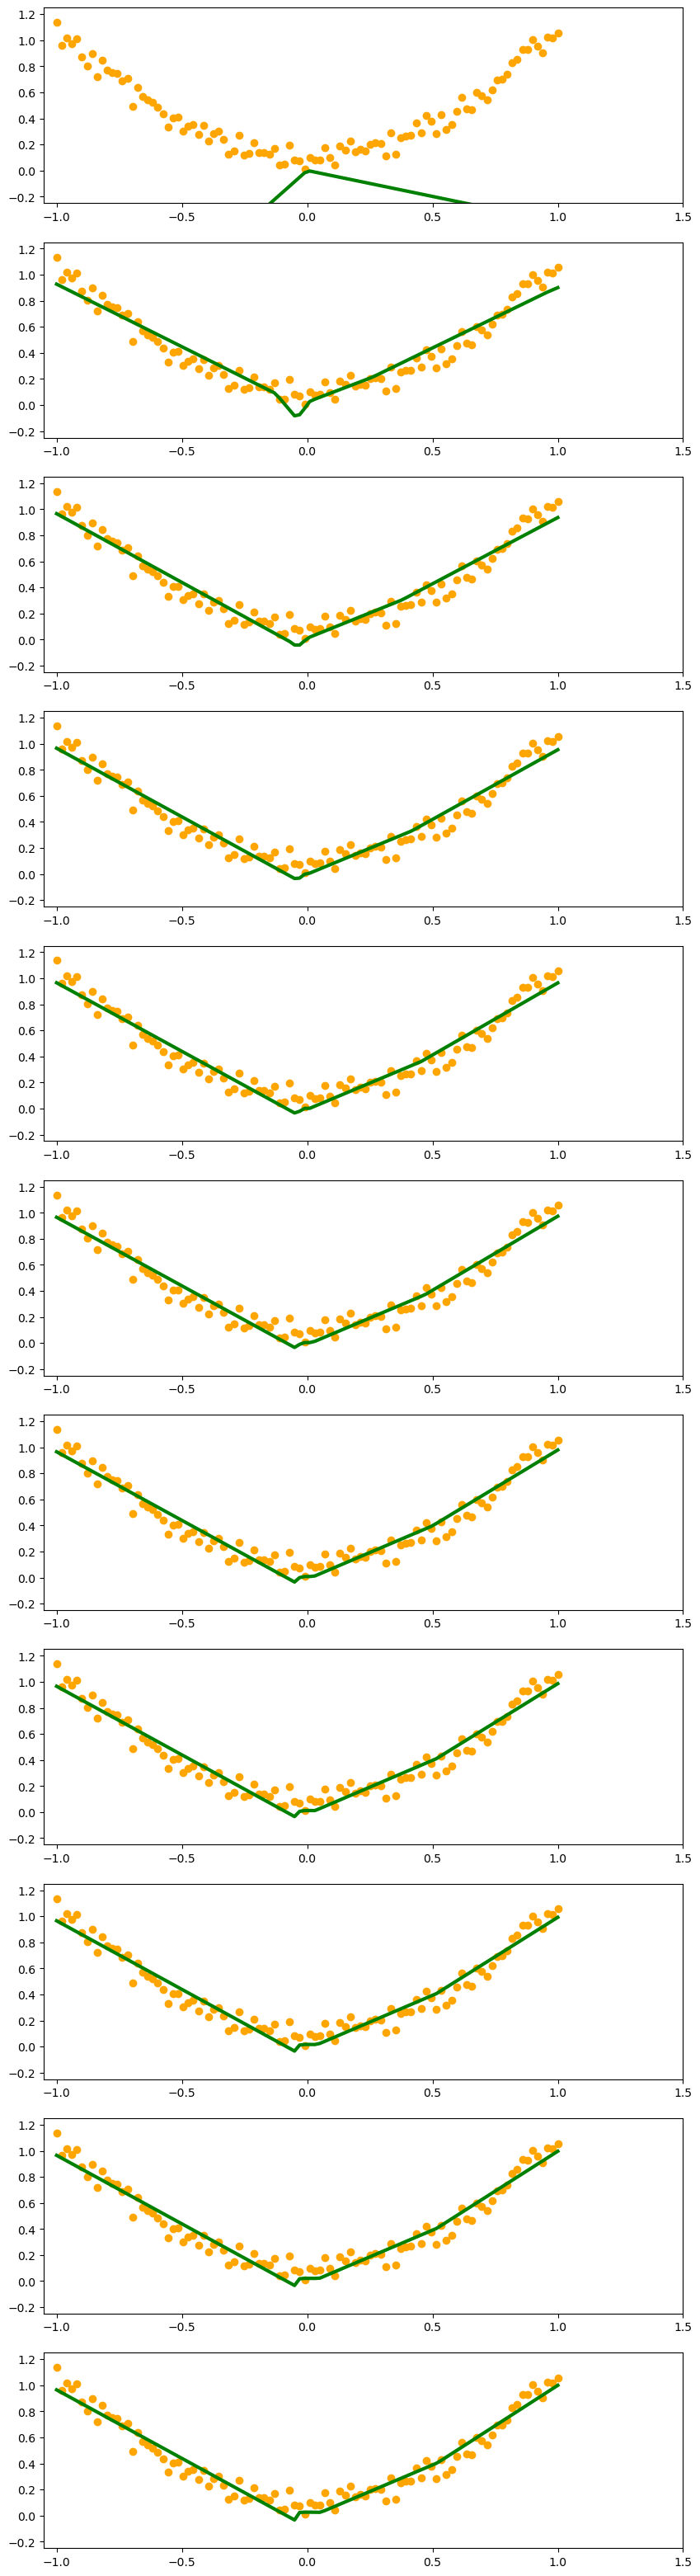

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)


Метрики на тестовом наборе:
Accuracy: 0.7781
Precision: 0.2742
Recall: 0.3953
F1: 0.3238

Матрица путаницы на тестовом наборе:
[[232  45]
 [ 26  17]]


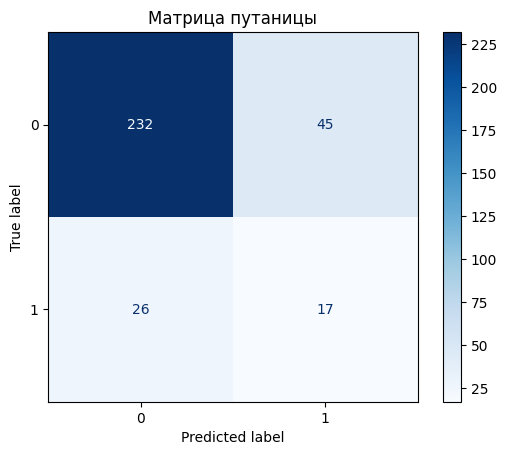

In [193]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons, requires_grad=False)
    self.biases = torch.zeros(n_neurons, requires_grad=False)

  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.inputs @ self.weights + self.biases
    return self.output

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T @ dvalues
      self.dbiases = torch.sum(dvalues, dim=0)
      self.dinputs = dvalues @ self.weights.T

class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()
      self.dinputs[self.inputs <= 0] = 0

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = sample_losses.mean()
    return data_loss

class MSELoss(Loss):
  def forward(self, y_pred, y_true):
    sample_losses = torch.mean((y_true - y_pred) ** 2, dim=-1)
    return sample_losses

  def backward(self, dvalues, y_true):
    with torch.no_grad():
      samples = len(dvalues)
      outputs = dvalues.shape[1] if len(dvalues.shape) > 1 else 1
      self.dinputs = -2 * (y_true - dvalues) / (samples * outputs)


# 1. Загрузка и подготовка данных
df = pd.read_csv('winequality-red.csv', sep=',')
df['quality_binary'] = (df['quality'] >= 7).astype('int')
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_tensor = torch.from_numpy(X_train_scaled).to(dtype=torch.float32)
y_train_tensor = torch.from_numpy(y_train.values).to(dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.from_numpy(X_test_scaled).to(dtype=torch.float32)
y_test_tensor = torch.from_numpy(y_test.values).to(dtype=torch.float32).view(-1, 1)

# 2. Создание и обучение сетки
n_inputs = X_train_tensor.shape[1]
n_hidden_neurons = 32
n_outputs = 1
fc1 = Dense(n_inputs, n_hidden_neurons)
relu1 = Activation_ReLU()
fc2 = Dense(n_hidden_neurons, n_outputs)
loss_func = MSELoss()
lr = 0.01
epochs = 500

for epoch in __builtins__.range(epochs):
    out1 = fc1.forward(X_train_tensor)
    out_relu = relu1.forward(out1)
    output = fc2.forward(out_relu)
    data_loss = loss_func.calculate(output, y_train_tensor)
    loss_func.backward(output, y_train_tensor)
    fc2.backward(loss_func.dinputs)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

# 3. Оценка модели на тестовых данных
out1_test = fc1.forward(X_test_tensor)
out_relu_test = relu1.forward(out1_test)
output_test = fc2.forward(out_relu_test)
predictions = (output_test > 0.5).float()

y_test_numpy = y_test_tensor.cpu().numpy()
predictions_numpy = predictions.cpu().numpy()

# Расчет метрик
accuracy = accuracy_score(y_test_numpy, predictions_numpy)
precision = precision_score(y_test_numpy, predictions_numpy, zero_division=0)
recall = recall_score(y_test_numpy, predictions_numpy, zero_division=0)
f1 = f1_score(y_test_numpy, predictions_numpy, zero_division=0)

print("\nМетрики на тестовом наборе:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

# Матрица путаницы
cm = confusion_matrix(y_test_numpy, predictions_numpy)
print("\nМатрица путаницы на тестовом наборе:")
print(cm)

# Визуализация матрицы путаницы
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица путаницы")
plt.show()